#**Projet FDD**
##**Prédiction du diabète**  
---
##**Membres du groupe :**

*   Duc Viet Nguyen
*   Théo Gayant  
---







## **1. Introduction**


Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est diabétique ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Ici tous les patients sont des femmes d'au moins 21 ans d'origine indienne Pima.

L'ensembles de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat si la personne a du diabète ou non. Les variables prédictives incluent le nombre de grossesses que la patiente a eues, son IMC, son taux d'insuline, son âge, sa pression artériel distolique (cad au moment de la phase de relâchement du cœur), l'épaisseur du pli cutané du triceps (formé par pincement de la peau entre le pouce et l'index donne une mesure très approximative de la masse grasse), la concentration en glucose de son plasma.

---
## **2. Dataset et prétraitement des données**

Import des bibliothèques

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn

Ouverture du fichier CSV et affichage des premières lignes

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df_original = df.copy()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Notre liste de colonnes et leur type : 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Notre dataset contient 768 lignes et 9 colonnes.

Ici on remarque que toutes nos colonnes sont de types numériques, il n'y aura donc pas besoin de les numériser.

Maitenant nous allons voir si il y a des données manquantes dans notre dataset :

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

Il n'y a aucune valeur manquante dans notre jeu de données.

Vérifier si il n'y a pas de valeur unique

In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Il y a uniquement 2 valeurs pour Outcome ce qui est normal car cette colonne permet de dire si une personne a le diabète ou non.

Maintenant nous allons afficher le nombre de femmes qui ont le diabètes ou non dans notre dataset.

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

On voit qu'il y a 500 femmes qui n'ont pas le diabètes et 268 qui l'ont.

Quel est l'age moyen d'une femme qui est diabétique ?

In [ ]:
df_diabetique = df[df['Outcome'] == 1]
df_diabetique['Age'].mean()

37.06716417910448

L'age moyen d'une femme qui est diabetique est de 37 ans.

---
## **3.Visualisation des données**

In [ ]:
df_pas_diabetique = df[df['Outcome'] == 0]

Le taux de glucose a-t-il un impact sur le diabète ?

Text(0.5, 0, 'Glucose')

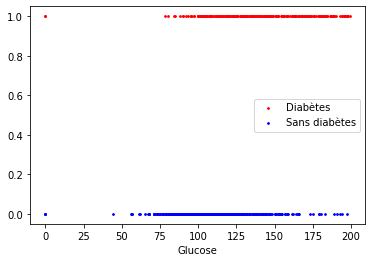

In [ ]:
plt.figure()
plt.scatter(df_diabetique.Glucose,df_diabetique.Outcome,label='Diabètes',color='r',s=3)
plt.scatter(df_pas_diabetique.Glucose,df_pas_diabetique['Outcome'],label='Sans diabètes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')

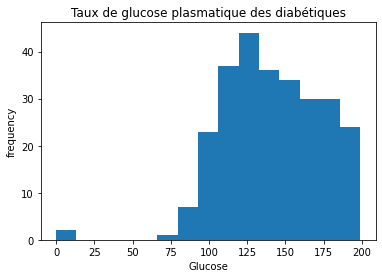

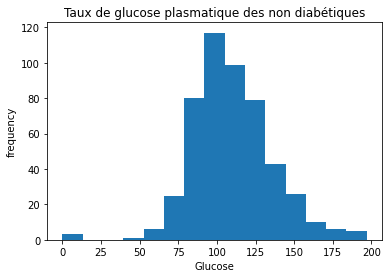

In [ ]:
plt.figure()
plt.hist(df_diabetique['Glucose'],bins=15)
plt.xlabel('Glucose')
plt.ylabel('frequency')
plt.title("Taux de glucose plasmatique des diabétiques")
plt.show()

print('\n')

plt.figure()
plt.hist(df_pas_diabetique['Glucose'],bins=15)
plt.xlabel('Glucose')
plt.ylabel('frequency')
plt.title("Taux de glucose plasmatique des non diabétiques")
plt.show()

D'après nos graphiques, on remarque que plus le taux de glucose est élevé, plus il y a de chance d'avoir le diabète. Inversement, plus le taux est bas plus il y a de chance d'être en absence de diabète.

Mais on remarque qu'il y a également des valeurs dont le glucose est à 0. Ici cela n'a aucun sens, on en conclut donc que ce sont des valeurs null qui ont été mise à la valeur 0.

Il est donc préférable de vérifier cela dans toute nos colonnes :

In [ ]:
for column in df.columns :
  print('Colonne : {:25s} --> {:3d} valeur(s) à zero.'.format(column, df[column].isin([0]).sum()))

Colonne : Pregnancies               --> 111 valeur(s) à zero.
Colonne : Glucose                   -->   5 valeur(s) à zero.
Colonne : BloodPressure             -->  35 valeur(s) à zero.
Colonne : SkinThickness             --> 227 valeur(s) à zero.
Colonne : Insulin                   --> 374 valeur(s) à zero.
Colonne : BMI                       -->  11 valeur(s) à zero.
Colonne : DiabetesPedigreeFunction  -->   0 valeur(s) à zero.
Colonne : Age                       -->   0 valeur(s) à zero.
Colonne : Outcome                   --> 500 valeur(s) à zero.


Pour le nombre de grosesses (Pregnancies) la valeur 0 est accepté car elle est significatif, elle a un sens, tout comme pour la valeur de Outcome qui indique si on est diabetique (=1) ou non (=0).
Pour les autres colonnes cela représente probablement des données manquantes.

Pour remédier a cela, on a décider de remplacer pour le moment toute les valeurs 0 par NaN afin d'avoir une meilleur visualisation de nos données.

In [ ]:
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    df[col] = df[col].replace(to_replace=0, value=np.NaN)

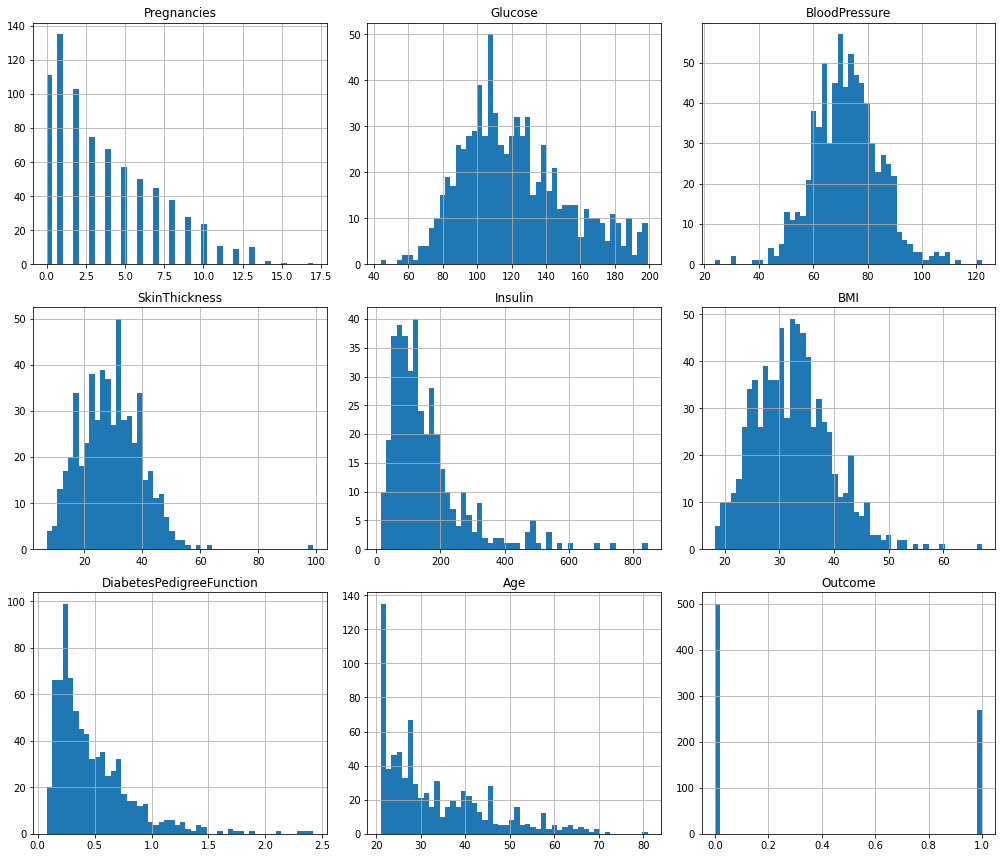

In [ ]:
df.hist(bins=50, figsize = (14, 12))
plt.tight_layout(True)

plt.show()

There are 268 (34.90%) people who have diabetes and the remaining 500 (65.10%) who have not been diagnosed with the desease.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


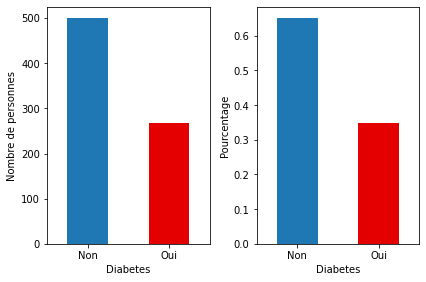

In [ ]:
num_diabetes = df[ "Outcome" ].sum()
num_no_diabetes = df.shape[ 0 ] - num_diabetes
perc_diabetes = num_diabetes / df.shape[ 0 ] * 100
perc_no_diabetes = num_no_diabetes / df.shape[ 0 ] * 100
print( "There are %d (%.2f%%) people who have diabetes and the remaining %d (%.2f%%) who have not been diagnosed with the desease." % ( num_diabetes, perc_diabetes, num_no_diabetes, perc_no_diabetes ) )

def plot_diabetes( normalize ):
    plt.grid( False )
    df.Outcome.value_counts( normalize=normalize ).plot( kind="bar", grid=False, color=[ sns.color_palette()[ 0 ], sns.colors.xkcd_rgb.get( 'red' ) ] )
    plt.xticks( [ 0, 1 ], [ 'Non', 'Oui' ], rotation=0 )
    plt.xlabel( "Diabetes" )
    
    if ( normalize == False ):
        plt.ylabel( "Nombre de personnes" )
    else:
        plt.ylabel( "Pourcentage" )
        
    return
    
plt.subplot( 1, 2, 1 )
plot_diabetes( False )
plt.subplot( 1, 2, 2 )
plot_diabetes( True )
plt.tight_layout( True )
plt.show()

Count: nombre d'observations
Mean: Moyenne des valeurs<br>
Std: écart type des valeurs
Min: valeur minimale
Max: valeur maximale
Q1 : 25 % des valeurs du quartile inférieur
Médiane : valeur centrale
Q3 : 75 % des valeurs du quartile supérieur

In [ ]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Nous pouvons voir ici, par exemeple, que les valeurs maximales (voire la moitié de celles-ci) des colonnes "SkinThickness" et "Insulin" sont bien éloignées de la moyenne, ceci demontre peut-être la présence des outliers.


Nous allons donc utiliser les BoxPlot afin de mieux voir la dispersion, la centralité de la distribution, notamment de mieux observer ces outliers.

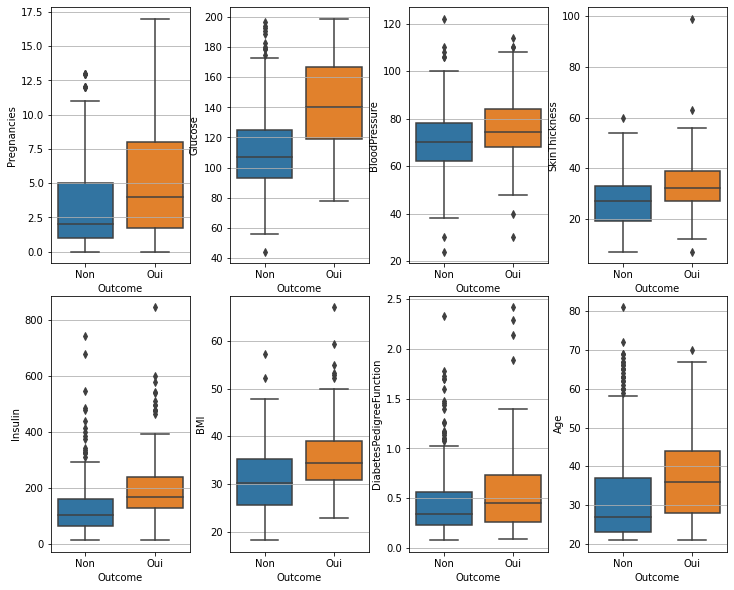

In [ ]:
plt.figure(figsize=(10,8))
for i in range( 8 ):
    plt.subplot( 2, 4, i + 1 )
    plt.grid(True)
    sns.boxplot( x='Outcome', y=df.columns[i], data=df )
    plt.xticks([0,1], ['Non','Oui'],rotation=0)
plt.tight_layout(False)
plt.show()

Comme nous l'avons dit précedemment, nous voyons des outliers qui sont même deux fois supérieurs à la médiane, donc fort éloignés du centre.

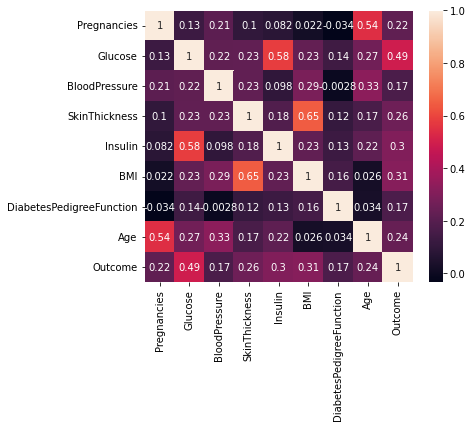

In [ ]:
plt.figure(figsize = (6.0, 5.0))
plt.grid(True)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Cette matrice de corrélation, nous permet de remarquer l'impact qu'ont certaines caractéristiques sur d'autres :
* Age-Pregnancies : Les grossesses peuvent augmenter avec l'âge et s'arrêter après un certain âge, ce qui est normal ;
* Glucose-Outcome : Il y a une forte probabilité d'être diagnostiqué diabètique lorsqu'on a un grand taux de sucre dans le sang ;
* Glucose-Insulin : Plus le taux de glucose est élevé, plus le taux d'insuline l'est aussi car le corp libère de l'insuline pour aider l'organisme à utiliser et/ou à stocker ce glucose.;  
* BMI-SkinThickness : Plus l'IMC est élevé, plus la personne est grosse et a donc une épaisseur de peau plus épaisse.

---
## **4. Apprentissage et prédiction**

### **Remplacement des valeurs manquantes**

Nous avons remarqué que les colonnes "Glucose", "BloodPressure", "SkinThickness" et "Insulin" ont des valeurs = 0, ce qui n'a aucun sens, et donc dans le but de remedier à ce problème, nous allons remplacer ces valeurs erronées par la médiane des valeurs de la colonne.  
Pour chaque colonne il y aura 2 médianes, une pour les diabétiques et une autre pour les non diabétiques afin que nos données reste cohérente.

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
colonne_avec_val_manquante = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in colonne_avec_val_manquante :
  #df[col] = df[col].replace(to_replace=0, value=np.NaN)
  med_diabete = round(df[df['Outcome'] == 1][col].median(),2)
  med_no_diabete = round(df[df['Outcome'] == 0][col].median(),2)
  df[col] = np.where((df['Outcome'] == 1) & (df[col].isnull()) , med_diabete, df[col])
  df[col] = np.where((df['Outcome'] == 0) & (df[col].isnull()) , med_no_diabete, df[col])

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


### **Séparation des données en train & test**

In [ ]:
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression

On sépare nos données en mettant dans X nos features et dans Y le label (c'est à dire le resultat que l'on veut prédire)

In [ ]:
X = df.drop(["Outcome"], axis=1)
Y = df.Outcome
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


Ensuite, on split nos données en mettant d'un côté 80% des données pour le train et 20% pour le test.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5, stratify=Y)
print("Train : X : ", X_train.shape," | Y : ", Y_train.shape)
print(" Test : X : ",  X_test.shape," | Y : ",  Y_test.shape)

Train : X :  (537, 8)  | Y :  (537,)
 Test : X :  (231, 8)  | Y :  (231,)


Notre ensemble de données est maintenant divisé en trai et test.

In [ ]:
print("TRAINING SET")
print(X_train.head(3))
print(Y_train.head(3))

print("\n------\n")

print("TEST SET")
print(X_test.head(3))
print(Y_test.head(3))

TRAINING SET
     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
101            1    151.0           60.0  ...  26.1                     0.179   22
563            6     99.0           60.0  ...  26.9                     0.497   32
290            0     78.0           88.0  ...  36.9                     0.434   21

[3 rows x 8 columns]
101    0
563    0
290    0
Name: Outcome, dtype: int64

------

TEST SET
     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
470            1    144.0           82.0  ...  41.3                     0.607   28
20             3    126.0           88.0  ...  39.3                     0.704   27
384            1    125.0           70.0  ...  24.3                     0.221   25

[3 rows x 8 columns]
470    0
20     0
384    0
Name: Outcome, dtype: int64


### **SVM**

Ici, on va tester et expérimenté différent noyau SVM comme linéaire, polynomiale,.. afin de les comparer et trouver le plus efficace.

In [ ]:
from sklearn import svm
from sklearn.metrics import *

#### **SVM AVEC NOYAU LINEAIRE**

On utilise le modèle SVM avec un noyau linéaire, on lui passe nos données de train pour l'apprentissage.

In [ ]:
#Initialisation d'un vecteur qui va au fur et à mesure conserver les différents noms d'algo et leur accuracy trouvé :
model_summary =[]

In [ ]:
clf = svm.SVC(kernel='linear', C=0.001)
clf.fit(X_train, Y_train)

SVC(C=0.001, kernel='linear')

Le paramètre de régularisation ( en python, il s'appelle C ) indique à l'optimisation SVM à quel point vous voulez éviter de manquer la classification de chaque exemple d'entraînement.

Si le C est supérieur , l'optimisation choisira un hyperplan de marge plus petit , de sorte que le taux de classification des données d'entraînement manquées sera inférieur .  
D'un autre côté, si le C est faible , la marge sera grande , même s'il y aura des exemples de données d'apprentissage classifiées manquantes . 

Ensuite, on essaie de prédire le diabète via ce modèle.

In [ ]:
Y_test_predict = clf.predict(X_test)

Affichons maintenant le pourcentage de prédiction de notre modèle : 

In [ ]:
print("Performance:\t{:.2f}".format(accuracy_score(Y_test, Y_test_predict)*100)+"%")
print("Précision:\t{:.2f}".format(precision_score(Y_test, Y_test_predict)*100)+"%")
print("Rappel:\t\t{:.2f}".format(recall_score(Y_test, Y_test_predict)*100)+"%")
print("F1-score:\t{:.2f}".format(f1_score(Y_test, Y_test_predict)*100)+"%")

Performance:	77.92%
Précision:	70.83%
Rappel:		62.96%
F1-score:	66.67%


In [ ]:
model_summary.append(dict(model='SVM Linear', accuracy_score=accuracy_score(Y_test, Y_test_predict), precision_score=precision_score(Y_test,Y_test_predict), recall_score=recall_score(Y_test, Y_test_predict), f1_score=f1_score(Y_test, Y_test_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


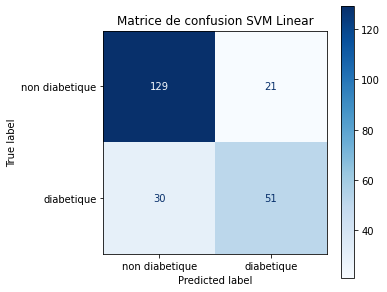

In [ ]:
# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 ax=ax
                                 )
disp.ax_.set_title('Matrice de confusion SVM Linear')
plt.show()

D'après notre matrice de confusion, on remarque qu'il y a eu 129/150 non diabétique qui ont bien été prédits, et 51/81 diabétique qui ont bien été prédits. Ce qui donne 180 sujets correctement prédits et 51 mal prédits.

Parmi ces mauvaises prédictions 30 sont des "non-detection" au diabéte et 21 de fausses alarmes.

Cette mauvaise prédiction, ce qui n'est pas bon car 30 sujets diabétiques sont prédits non diabétiques et ce nombre est supérieur au 21 fausses alarmes.

#### **SVM AVEC NOYAU POLY**

On utilise le modèle SVM avec un noyau polynomiale, on lui passe nos données de train pour l'apprentissage.

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

SVC(kernel='poly')

Ensuite, on essaie de prédire le diabète via ce modèle.

In [ ]:
Y_test_predict = clf.predict(X_test)

Affichons maintenant le pourcentage de prédiction de notre modèle : 

In [ ]:
print("Performance:\t{:.2f}".format(accuracy_score(Y_test, Y_test_predict)*100)+"%")
print("Précision:\t{:.2f}".format(precision_score(Y_test, Y_test_predict)*100)+"%")
print("Rappel:\t\t{:.2f}".format(recall_score(Y_test, Y_test_predict)*100)+"%")
print("F1-score:\t{:.2f}".format(f1_score(Y_test, Y_test_predict)*100)+"%")

Performance:	82.25%
Précision:	75.64%
Rappel:		72.84%
F1-score:	74.21%


In [ ]:
model_summary.append(dict(model='SVM Poly', accuracy_score=accuracy_score(Y_test, Y_test_predict), precision_score=precision_score(Y_test,Y_test_predict), recall_score=recall_score(Y_test, Y_test_predict), f1_score=f1_score(Y_test, Y_test_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


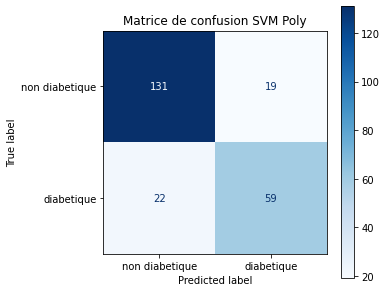

In [ ]:
# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 ax=ax
                                 )
disp.ax_.set_title('Matrice de confusion SVM Poly')
plt.show()

D'après notre matrice de confusion, on remarque qu'il y a eu 131/150 non diabétique qui ont bien été prédits, et 59/81 diabétique qui ont bien été prédits. Ce qui donne 190 sujets correctement prédits et 41 mal prédits. 

Parmi ces mauvaises prédictions 22 sont des "non-detection" au diabéte et 19 de fausses alarmes.

Ce noyau ne donne pas une bonne prédiction car 22 sujets diabétiques sont prédits non diabétiques et 19 fausses alarmes.

#### **SVM AVEC NOYAU RBF**

On utilise le modèle SVM avec un noyau RBF, on lui passe nos données de train pour l'apprentissage.

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)

SVC()

Ensuite, on essaie de prédire le diabète via ce modèle.

In [ ]:
Y_test_predict = clf.predict(X_test)

Affichons maintenant le pourcentage de prédiction de notre modèle : 

In [ ]:
print("Performance:\t{:.2f}".format(accuracy_score(Y_test, Y_test_predict)*100)+"%")
print("Précision:\t{:.2f}".format(precision_score(Y_test, Y_test_predict)*100)+"%")
print("Rappel:\t\t{:.2f}".format(recall_score(Y_test, Y_test_predict)*100)+"%")
print("F1-score:\t{:.2f}".format(f1_score(Y_test, Y_test_predict)*100)+"%")

Performance:	82.68%
Précision:	72.53%
Rappel:		81.48%
F1-score:	76.74%


In [ ]:
model_summary.append(dict(model='SVM RBF', accuracy_score=accuracy_score(Y_test, Y_test_predict), precision_score=precision_score(Y_test,Y_test_predict), recall_score=recall_score(Y_test, Y_test_predict), f1_score=f1_score(Y_test, Y_test_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


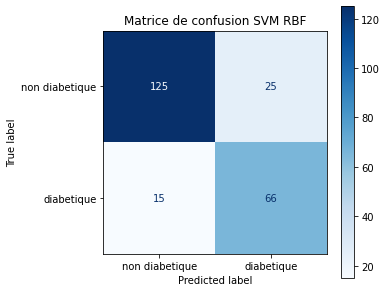

In [ ]:
# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 ax=ax
                                 )
disp.ax_.set_title('Matrice de confusion SVM RBF')
plt.show()

D'après notre matrice de confusion, on remarque qu'il y a eu 125/150 non diabétique qui ont bien été prédits, et 66/81 diabétique qui ont bien été prédits. Ce qui donne 189 sujets correctement prédits et 40 mal prédits.

Parmi ces mauvaises prédictions 15 sont des "non-detection" au diabéte et 25 de fausses alarmes.

Ce classifier est quand-même meilleur que les autres car il vaut mieux avoir un nombre (25) de fausses alarmes supérieur au nombre (15) de non-détection dans le cas de notre dataset.

#### **SVM AVEC NOYAU SIGMOID**

On utilise le modèle SVM avec un noyau Sigmoid, on lui passe nos données de train pour l'apprentissage.

In [ ]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Ensuite, on essaie de prédire le diabète via ce modèle.

In [ ]:
Y_test_predict = clf.predict(X_test)

Affichons maintenant le pourcentage de prédiction de notre modèle : 

In [ ]:
print("Performance:\t{:.2f}".format(accuracy_score(Y_test, Y_test_predict)*100)+"%")
print("Précision:\t{:.2f}".format(precision_score(Y_test, Y_test_predict)*100)+"%")
print("Rappel:\t\t{:.2f}".format(recall_score(Y_test, Y_test_predict)*100)+"%")
print("F1-score:\t{:.2f}".format(f1_score(Y_test, Y_test_predict)*100)+"%")

Performance:	38.10%
Précision:	1.56%
Rappel:		1.23%
F1-score:	1.38%


In [ ]:
model_summary.append(dict(model='SVM Sigmoid', accuracy_score=accuracy_score(Y_test, Y_test_predict), precision_score=precision_score(Y_test,Y_test_predict), recall_score=recall_score(Y_test, Y_test_predict), f1_score=f1_score(Y_test, Y_test_predict)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


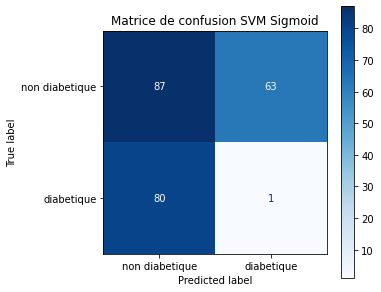

In [ ]:
# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 ax=ax
                                 )
disp.ax_.set_title('Matrice de confusion SVM Sigmoid')
plt.show()

D'après notre matrice de confusion, on remarque qu'il y a eu 87/150 non diabétique qui ont bien été prédits, et 1/81 diabétique qui ont bien été prédits. Ce qui donne 88 sujets correctement prédits et 143 mal prédits. 

Parmi ces mauvaises prédictions 80 sont des "non-detection" au diabéte et 63 de fausses alarmes.

Ce noyau comporte un fort taux de mauvaises prédictions par rapport aux bonnes ce qui n'est pas bon du tout.

#### **Comparaison des noyaux**

In [ ]:
df_sum = pd.DataFrame(model_summary)
df_sum

,model,accuracy_score,precision_score,recall_score,f1_score
0,SVM Linear,0.779221,0.708333,0.629630,0.666667
1,SVM Poly,0.822511,0.756410,0.728395,0.742138
2,SVM RBF,0.826840,0.725275,0.814815,0.767442
3,SVM Sigmoid,0.380952,0.015625,0.012346,0.013793


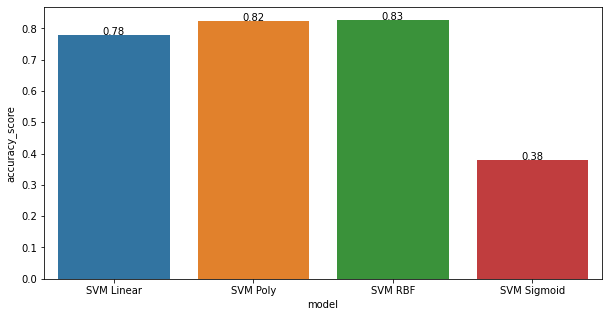

In [ ]:
figure = plt.figure(figsize=(10,5))
ax = sns.barplot(y='accuracy_score', x='model', data=df_sum)
# j'ajoute les valeurs
for index, row in df_sum.iterrows():
    ax.text(row.name,row.accuracy_score, round(row.accuracy_score,2), color='black', ha="center")

plt.show()

Parmis les 4 noyaux expérimentés, celui qui a le meilleur taux de bonne classification ou le plus performant est le linéaire, mais le sigmoid est le pire avec un pourcentage très éloigné des autres modèles.

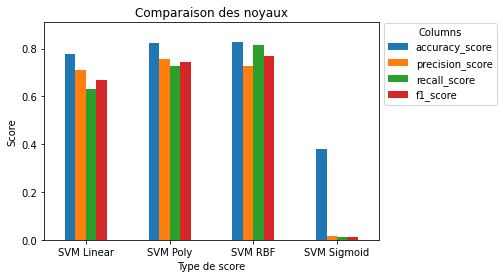

In [ ]:
ax = df_sum.plot(kind='bar', rot=0, xlabel='Type de score', ylabel='Score', title='Comparaison des noyaux', figsize=(6, 4))

# add some labels
# for c in ax.containers:
#     # set the bar label
#     ax.bar_label(c, fmt='%.0f', label_type='edge')
ax.set_xticklabels(df_sum['model'])
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

# move the legend out of the plot
ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')

### **Réseaux Bayésiens**

In [ ]:
from sklearn.naive_bayes import GaussianNB

Création du classifieur Bayésien :

In [ ]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_test_predict = clf.predict(X_test)

In [ ]:
print("Performance:\t{:.2f}".format(accuracy_score(Y_test, Y_test_predict)*100)+"%")
print("Précision:\t{:.2f}".format(precision_score(Y_test, Y_test_predict)*100)+"%")
print("Rappel:\t\t{:.2f}".format(recall_score(Y_test, Y_test_predict)*100)+"%")
print("F1-score:\t{:.2f}".format(f1_score(Y_test, Y_test_predict)*100)+"%")

Performance:	76.62%
Précision:	66.27%
Rappel:		67.90%
F1-score:	67.07%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


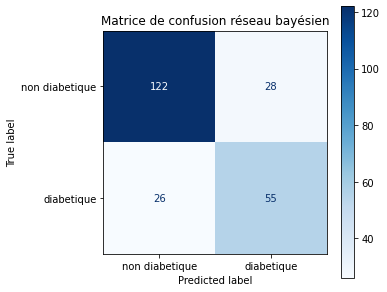

In [ ]:
# Matrice de confusion
class_names = ['non diabetique', 'diabetique']
fig, ax = plt.subplots(figsize=(5, 5))
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 ax=ax
                                 )
disp.ax_.set_title('Matrice de confusion réseau bayésien')
plt.show()

### **Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x_numeric = df.select_dtypes(include=['int64', 'float64']).columns
print(x_numeric)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[x_numeric])
df['cluster'] = kmeans.labels_

df.groupby(by=['cluster', 'Outcome']).size()

cluster  Outcome
0        0          473
         1          239
1        0           27
         1           29
dtype: int64

En jouant avec les hyper paramètres de notre algorithme de clustering (nombre de cluster), nous n'arrivons pas à obtenir un apprentissage qui sépare de manière "satisfaisante" les observations entre les diabétique et les non-diabétique.

On va donc normaliser la donnée pour voir si cela change quelque chose.

#### **Normalisation de la données**

In [ ]:
df_diabetique = df[df['Outcome'] == 1]
df_pas_diabetique = df[df['Outcome'] == 0]

On affiche pour chaque variable numérique la distribution des différentes valeurs :

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


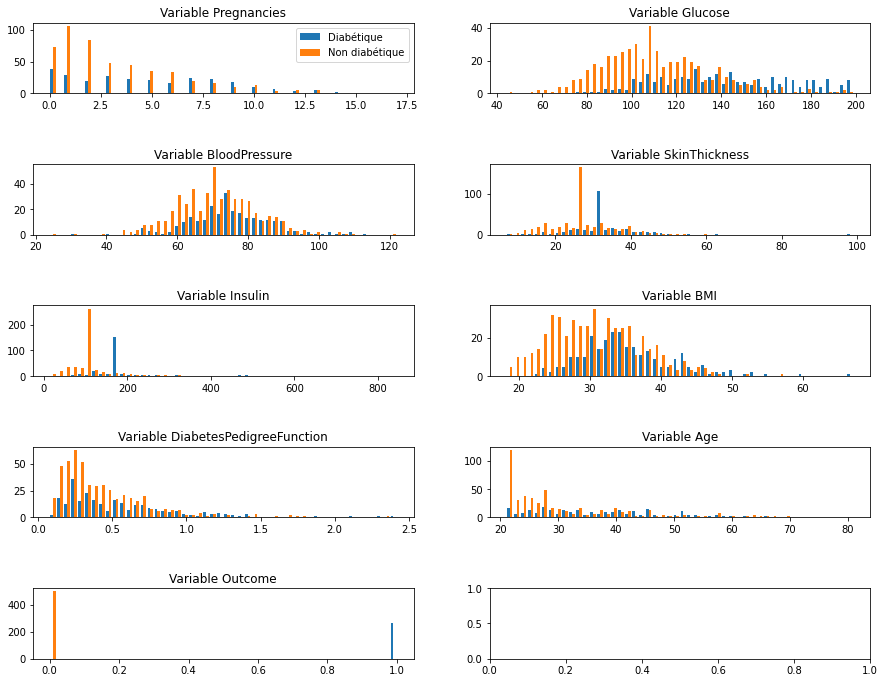

In [ ]:
import math

df["Outcome_Name"] = df["Outcome"]
df["Outcome_Name"] = df["Outcome_Name"].replace(to_replace=0, value="Non diabétique")
df["Outcome_Name"] = df["Outcome_Name"].replace(to_replace=1, value="Diabétique")

variables = x_numeric
labels = df["Outcome_Name"].unique()

fig, axes = plt.subplots(
    nrows=math.ceil(len(variables)/2), 
    ncols=2, 
    figsize=(15, 1.3*len(variables)))
plt.subplots_adjust(hspace=1)

i = 0
for col in variables:
    data = [df_diabetique[col], df_pas_diabetique[col]]
    ax = axes[i//2, i%2]
    ax.hist(data, bins=50, label=labels)
    ax.title.set_text(f"Variable {col}")
    i += 1
    
axes[0,0].legend(prop={'size': 10})

Les histogrammes précédents montrent que les variables n'ont pas toutes les même échelles de valeurs. Cela influence la fonction de distance utilisée par le K-Means.  
De plus on remarque qu'il n'y a pas de variable qui permette de séparer facilement les diabétiques et les non diabétiques.  
Même si on a l'impression que le glucose et le BMI sont un peu plus élevé pour les diabétiques. Et skinThickness sépare un petit peu les diabétique et non diabétique.
On va donc normalisé nos données (toute numérique ici) avec la normalisation min-max

In [ ]:
df_norm = (df[x_numeric] - df[x_numeric].min()) / (df[x_numeric].max() - df[x_numeric].min())
df_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.186899,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.106370,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.271739,0.186899,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.217391,0.106370,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.271739,0.186899,0.243354,0.115713,0.433333,1.0


Maintenant que nos variables sont normalisées, on va refaire le kMeans :

In [ ]:
df_norm['Outcome'] = df['Outcome_Name']
df_norm['Outcome'].astype('object')
x_numeric_norm = df_norm.select_dtypes(include=['int64', 'float64']).columns

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_norm[x_numeric_norm])
df_norm['cluster'] = kmeans.labels_

df_norm.groupby(by=['cluster', 'Outcome']).size()

cluster  Outcome       
0        Diabétique         72
         Non diabétique     43
1        Diabétique         33
         Non diabétique    305
2        Diabétique        100
         Non diabétique     69
3        Diabétique         63
         Non diabétique     83
dtype: int64

Avec des données normalisées le clustering et en jouant avec le nombre de cluster, on ne réussit par à obtenir un nombre de cluster qui sépare bien nos données. Cela est probablement dû au fait qu'aucune variable ne sépare pas très bien les diabétiques et non diabétiques.

### Arbre de décision

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
X = df.drop(["Outcome"], axis=1)
Y = df.Outcome
#stratify chiq ti le 0 o Y bang nhau
X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle =True, stratify= Y)

In [ ]:
impute = SimpleImputer(missing_values = np.nan, strategy='median')

In [ ]:
X_train_fix = impute.fit_transform(X_Train)
X_test_fix = impute.fit_transform(X_Test)

In [ ]:
X_train_fix

array([[1.00e+00, 9.00e+01, 6.20e+01, ..., 2.72e+01, 5.80e-01, 2.40e+01],
       [5.00e+00, 1.26e+02, 7.80e+01, ..., 2.96e+01, 4.39e-01, 4.00e+01],
       [2.00e+00, 1.05e+02, 5.80e+01, ..., 3.49e+01, 2.25e-01, 2.50e+01],
       ...,
       [1.00e+00, 9.70e+01, 7.00e+01, ..., 3.81e+01, 2.18e-01, 3.00e+01],
       [1.00e+01, 1.11e+02, 7.00e+01, ..., 2.75e+01, 1.41e-01, 4.00e+01],
       [4.00e+00, 1.44e+02, 5.80e+01, ..., 2.95e+01, 2.87e-01, 3.70e+01]])

In [ ]:
#scalling
#tiền xử lý dữ liệu liên quan den ky thuat standardization để rescale lại input và output trước khi huấn luyện mô hình.
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_normal = s.fit_transform(X_train_fix)
X_test_normal = s.fit_transform(X_test_fix)

In [ ]:
data_X_train_normal = pd.DataFrame( X_train_normal, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age" ], index=y_train.index )
data_y_train_normal = pd.DataFrame( y_train, columns = ["Outcome"])
data_train_normalized = data_X_train_normal.join( data_y_train_normal )

In [ ]:
#built model
# build model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(data_X_train_normal, data_y_train_normal)

In [ ]:
# predict
y_pred = classifier.predict(X_test_normal)
print(y_pred)

[0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print(confusion_matrix(y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

[[84 16]
 [14 40]]
Accuracy: 0.8051948051948052


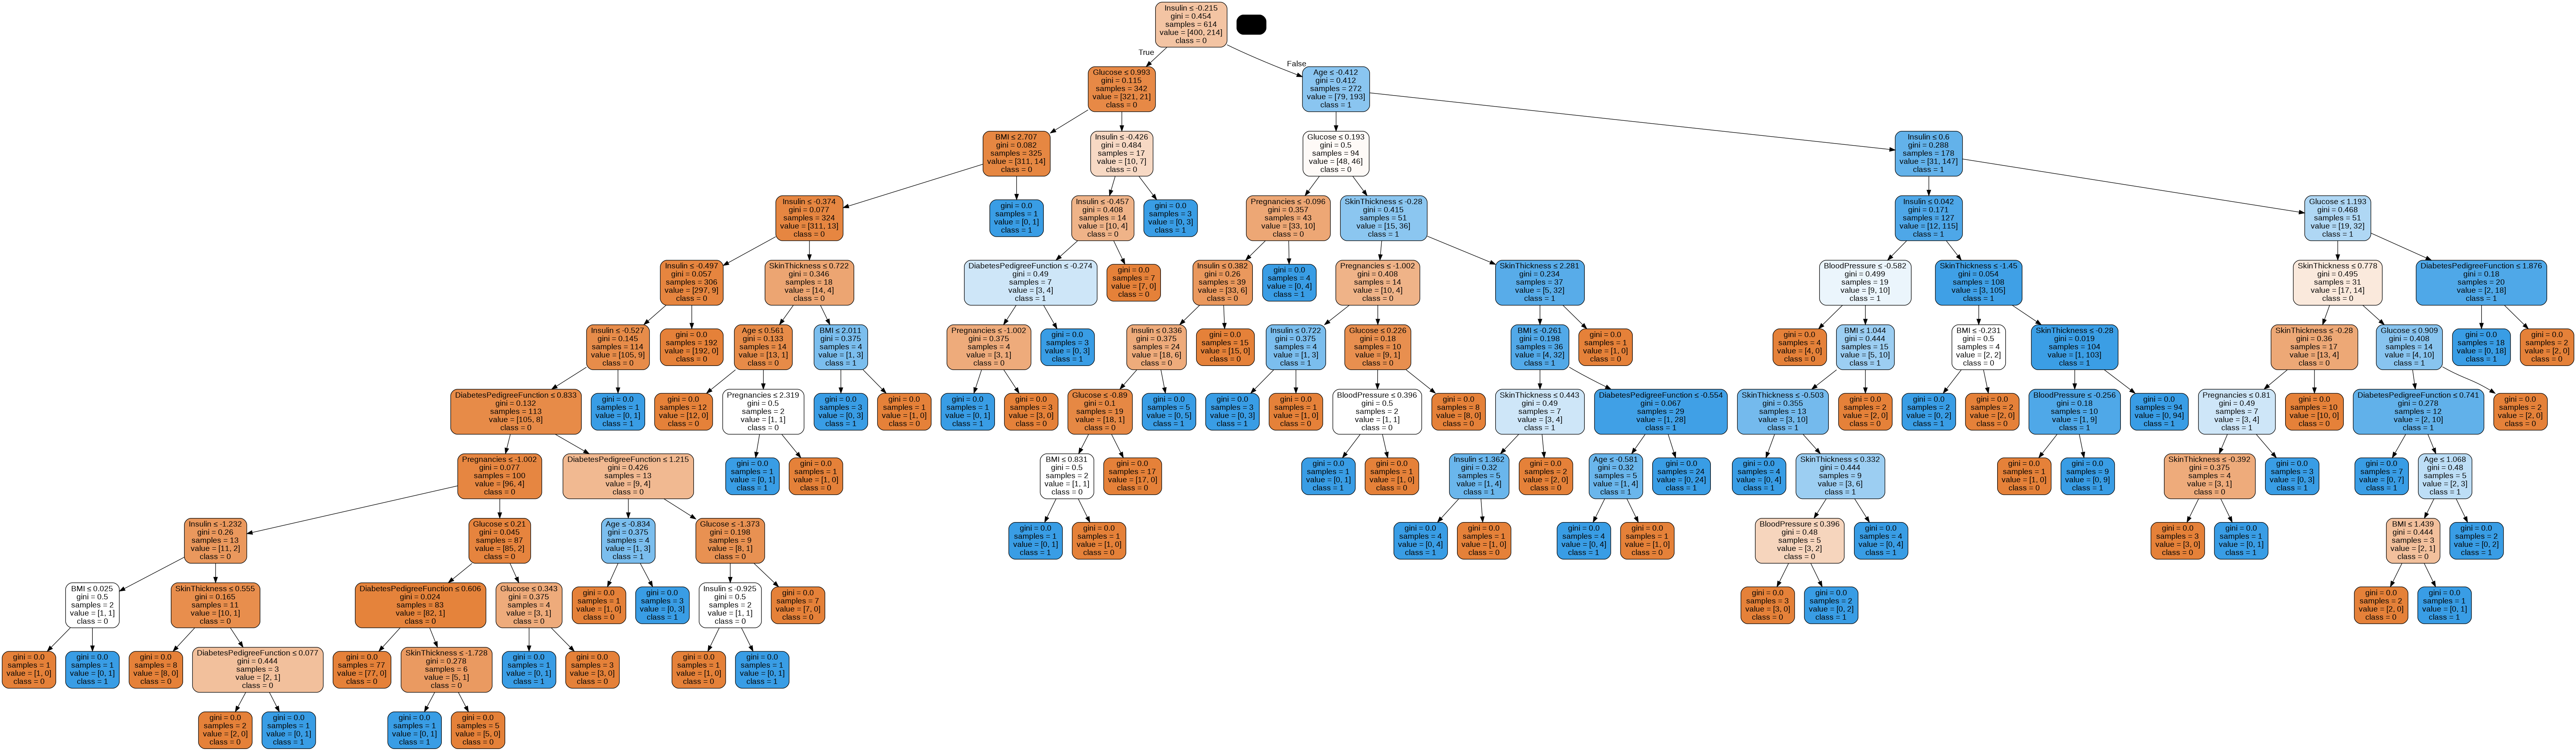

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

L'arbre qu'on a obtenu est très difficile à observer en raison de sa complexité donc trés difficile à analyser 

---
# **5. Conclusion**

Pour conclure, ce travail visait à exploiter des données sur les caractéristiques physiques des personnes atteintes ou non du diabète et ainsi prédire si une personne était atteinte de celui ci.  

Toutes nos variables étaient de type numérique, ce qui nous a donc évité de les numériser, mais nous n'avions pas remarqué au début que certaines valeures étaient à 0, et ce qui réprésenté dans notre cas des valeurs manquantes pour certaines variables car cela n'avait aucun sens. Nous avons donc remplacé ces valeurs manquantes par la médiane des diabètiques et non diabétiques selon la personne.  
Durant notre étude, on a remarqué que plusieurs facteurs favorisé le diabète comme le taux de glucose, d'insuline et le BMI.

Afin de prédire si une personne était atteinte de diabète, nous avons utilisé différents classifiers (SVM avec différent noyau, réseau bayésiens clustering, arbre de décision), avec le classifier SVM noyau rbf nous avons réussi à obtenir une accuracy de prédiction à 82% et il prédisait également moins de "non-détection" au diabète (faux non diabètique) que de fausse alarme (faux diabétique) ce qui dans notre cas est plus intérressant car il préférable d'avoir plus de fausses alarmes que des non détections. 

Mais nous avons remarqué également que pour l'arbre de décision et le clustering, cela était difficile pour les partager, cela est probablement dû à nos variables qui ne permettent pas assez de différencier un diabétique d'un  non diabétique et peut-être le nombre de personnes dans notre datasets (767 seulement)